In [190]:
import pandas as pd
import sklearn as skl
import sklearn.model_selection as skl_model_selection
import sklearn.linear_model as skl_linear_mdl
import sklearn.ensemble as skl_ensemble_mdl
import sklearn.discriminant_analysis as skl_discriminant_analysis
import sklearn.metrics as skl_metrics
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from statistics import mean 
from sklearn.metrics import auc
import numpy as np
import matplotlib.pyplot as plt


df_titanic_train = pd.read_csv(r"C:/Users/Alexandre/ProjetLamberton/Architeture Big Data/Kaggle/train.csv")
df_titanic_test = pd.read_csv(r"C:/Users/Alexandre/ProjetLamberton/Architeture Big Data/Kaggle/test.csv")
combine = [df_titanic_train, df_titanic_test]
i=0
for df_titanic in combine:


    #missing_index = list(df_titanic["Age"][df_titanic["Age"].isnull()].index)

    #for i in missing_index :
    #    median_age = df_titanic["Age"].median()
    #    filled_age = df_titanic["Age"][((df_titanic['Sex'] == df_titanic.iloc[i]["Sex"]) & 
    #                                (df_titanic['SibSp'] == df_titanic.iloc[i]["SibSp"]) & 
    #                                (df_titanic['Parch'] == df_titanic.iloc[i]["Parch"]) & 
    #                                (df_titanic['Pclass'] == df_titanic.iloc[i]["Pclass"]))].median()
    #    if not np.isnan(filled_age) :
    #        df_titanic['Age'].iloc[i] = filled_age
    #    else :
    #        df_titanic['Age'].iloc[i] = median_age
    df_titanic["Age"] = df_titanic["Age"].fillna(df_titanic["Age"].median())
    df_titanic["Fare"] = np.log1p(df_titanic["Fare"])
    cpt_row=0
    for row_titanic in df_titanic["Age"]:
        if row_titanic<16 :
                df_titanic.loc[[cpt_row], ['Age']]=1
        elif row_titanic>=16 and row_titanic<30:
                df_titanic.loc[[cpt_row], ['Age']]=0
        elif row_titanic>=30 and row_titanic<64:
            df_titanic.loc[[cpt_row], ['Age']]=0
        elif row_titanic>64:
                df_titanic.loc[[cpt_row], ['Age']]=0
        cpt_row=cpt_row+1
    df_titanic['Age*Class'] = df_titanic.Age * df_titanic.Pclass
    
    df_titanic["Sex*Class"]=df_titanic.Sex * df_titanic.Pclass
    cpt_row=0
    for row_titanic in df_titanic["Sex"]:
        if row_titanic== "male":
            df_titanic.loc[[cpt_row], ['Sex*Class']]=2*df_titanic.loc[[cpt_row], ['Pclass']]
            print(df_titanic.loc[[cpt_row], ['Sex*Class']])
        cpt_row=cpt_row+1
            
    

    df_titanic = pd.get_dummies(df_titanic, columns = ["Age"])
    df_titanic = pd.get_dummies(df_titanic, columns = ["Sex"])
    df_titanic["Embarked"] = df_titanic["Embarked"].fillna("S")
    df_titanic = pd.get_dummies(df_titanic, columns = ["Embarked"], prefix="Emb")
    cpt_row=0
    for row_titanic in df_titanic["Cabin"]:
        if str(row_titanic)=="":
            df_titanic.loc[[cpt_row], ['Cabin']]=0
        elif str(row_titanic)[0]=="A":
                df_titanic.loc[[cpt_row], ['Cabin']]=1
        elif str(row_titanic)[0]=="B":
                df_titanic.loc[[cpt_row], ['Cabin']]=1
        elif str(row_titanic)[0]=="C":
                df_titanic.loc[[cpt_row], ['Cabin']]=1
        elif str(row_titanic)[0]=="D":
                df_titanic.loc[[cpt_row], ['Cabin']]=1
        elif str(row_titanic)[0]=="E":
                df_titanic.loc[[cpt_row], ['Cabin']]=1
        elif str(row_titanic)[0]=="F":
                df_titanic.loc[[cpt_row], ['Cabin']]=1
        elif str(row_titanic)[0]=="G":
                df_titanic.loc[[cpt_row], ['Cabin']]=1
        else:
            df_titanic.loc[[cpt_row], ['Cabin']]=0
        cpt_row=cpt_row+1

    df_titanic = pd.get_dummies(df_titanic, columns = ["Cabin"])
    cpt_row=0
    df_titanic["Fare"]=df_titanic["Fare"].astype("float")
    df_titanic["Fare"] = df_titanic["Fare"].fillna(df_titanic["Fare"].median())
    df_titanic["Fare"] = np.log1p(df_titanic["Fare"])
    #for row_titanic in df_titanic["Fare"]:
    #    if row_titanic<8:
    #        df_titanic.loc[[cpt_row], ['Fare']]=0
    #    elif row_titanic>=8 and  row_titanic<17 :
    #        df_titanic.loc[[cpt_row], ['Fare']]=1
    #    elif row_titanic>=17 and  row_titanic<35 :
    #        df_titanic.loc[[cpt_row], ['Fare']]=1
    #    elif row_titanic>50:
    #        df_titanic.loc[[cpt_row], ['Fare']]=1
    #    else:
    #        df_titanic.loc[[cpt_row], ['Fare']]=0
    #    cpt_row=cpt_row+1

    #df_titanic = pd.get_dummies(df_titanic, columns = ["Fare"])
    df_titanic["FamiliySize"]=df_titanic["SibSp"]+df_titanic["Parch"]+1

    df_titanic['Single'] = df_titanic['FamiliySize'].map(lambda s: 1 if s == 1 else 0)
    df_titanic['SmallF'] = df_titanic['FamiliySize'].map(lambda s: 1 if  s == 2  else 0)
    df_titanic['MedF'] = df_titanic['FamiliySize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
    df_titanic['LargeF'] = df_titanic['FamiliySize'].map(lambda s: 1 if s >= 5 else 0)

    cpt_row=0
    #print(df_titanic['FamiliySize'])
    df_titanic["Alone"]=0
    for row_titanic in df_titanic["FamiliySize"]:
        if int(row_titanic)<=2:
            #print("o")
             df_titanic.loc[[cpt_row], ['Alone']]=0
        else:
            #print("k")
            df_titanic.loc[[cpt_row], ['Alone']]=1
    
    df_titanic = pd.get_dummies(df_titanic, columns = ["Alone"])
    cpt_row=0
    for row_titanic in df_titanic["Ticket"]:
        if row_titanic.isdigit()==True:
            df_titanic.loc[[cpt_row], ['Ticket']]=0
        else:
            df_titanic.loc[[cpt_row], ['Ticket']]=1
        cpt_row=cpt_row+1
    df_titanic = pd.get_dummies(df_titanic, columns = ["Ticket"])


    salutation = [i.split(",")[1].split(".")[0].strip() for i in df_titanic["Name"]]
    df_titanic["Title"] = pd.Series(salutation)
    df_titanic["Title"].unique()
    df_titanic["Title"] = df_titanic["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df_titanic["Title"] = df_titanic["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
    df_titanic["Title"] = df_titanic["Title"].astype(int)
    df_titanic = pd.get_dummies(df_titanic, columns = ["Title"])
    df_titanic=df_titanic.drop("Name", axis=1)

   
    combine[i]=df_titanic
    i=i+1
    print(df_titanic.head())
    print(df_titanic["Sex*Class"])
        



  Sex*Class
0       NaN
  Sex*Class
4       NaN
  Sex*Class
5       NaN
  Sex*Class
6       NaN
  Sex*Class
7       NaN
   Sex*Class
12       NaN
   Sex*Class
13       NaN
   Sex*Class
16       NaN
   Sex*Class
17       NaN
   Sex*Class
20       NaN
   Sex*Class
21       NaN
   Sex*Class
23       NaN
   Sex*Class
26       NaN
   Sex*Class
27       NaN
   Sex*Class
29       NaN
   Sex*Class
30       NaN
   Sex*Class
33       NaN
   Sex*Class
34       NaN
   Sex*Class
35       NaN
   Sex*Class
36       NaN
   Sex*Class
37       NaN
   Sex*Class
42       NaN
   Sex*Class
45       NaN
   Sex*Class
46       NaN
   Sex*Class
48       NaN
   Sex*Class
50       NaN
   Sex*Class
51       NaN
   Sex*Class
54       NaN
   Sex*Class
55       NaN
   Sex*Class
57       NaN
   Sex*Class
59       NaN
   Sex*Class
60       NaN
   Sex*Class
62       NaN
   Sex*Class
63       NaN
   Sex*Class
64       NaN
   Sex*Class
65       NaN
   Sex*Class
67       NaN
   Sex*Class
69       NaN
   Sex*Class
70       

    Sex*Class
487       NaN
    Sex*Class
488       NaN
    Sex*Class
489       NaN
    Sex*Class
490       NaN
    Sex*Class
491       NaN
    Sex*Class
492       NaN
    Sex*Class
493       NaN
    Sex*Class
494       NaN
    Sex*Class
495       NaN
    Sex*Class
497       NaN
    Sex*Class
499       NaN
    Sex*Class
500       NaN
    Sex*Class
505       NaN
    Sex*Class
507       NaN
    Sex*Class
508       NaN
    Sex*Class
509       NaN
    Sex*Class
510       NaN
    Sex*Class
511       NaN
    Sex*Class
512       NaN
    Sex*Class
514       NaN
    Sex*Class
515       NaN
    Sex*Class
517       NaN
    Sex*Class
519       NaN
    Sex*Class
521       NaN
    Sex*Class
522       NaN
    Sex*Class
524       NaN
    Sex*Class
525       NaN
    Sex*Class
527       NaN
    Sex*Class
528       NaN
    Sex*Class
529       NaN
    Sex*Class
531       NaN
    Sex*Class
532       NaN
    Sex*Class
536       NaN
    Sex*Class
538       NaN
    Sex*Class
543       NaN
    Sex*Class
544   

  Sex*Class
0       NaN
  Sex*Class
2       NaN
  Sex*Class
3       NaN
  Sex*Class
5       NaN
  Sex*Class
7       NaN
  Sex*Class
9       NaN
   Sex*Class
10       NaN
   Sex*Class
11       NaN
   Sex*Class
13       NaN
   Sex*Class
16       NaN
   Sex*Class
17       NaN
   Sex*Class
20       NaN
   Sex*Class
21       NaN
   Sex*Class
23       NaN
   Sex*Class
25       NaN
   Sex*Class
27       NaN
   Sex*Class
28       NaN
   Sex*Class
29       NaN
   Sex*Class
30       NaN
   Sex*Class
31       NaN
   Sex*Class
34       NaN
   Sex*Class
35       NaN
   Sex*Class
38       NaN
   Sex*Class
39       NaN
   Sex*Class
40       NaN
   Sex*Class
41       NaN
   Sex*Class
42       NaN
   Sex*Class
45       NaN
   Sex*Class
46       NaN
   Sex*Class
47       NaN
   Sex*Class
50       NaN
   Sex*Class
51       NaN
   Sex*Class
54       NaN
   Sex*Class
55       NaN
   Sex*Class
56       NaN
   Sex*Class
57       NaN
   Sex*Class
58       NaN
   Sex*Class
60       NaN
   Sex*Class
61       Na

In [154]:
def print_confusion_matrix(confusion_matrix):
    plt.figure()
    sns.heatmap(confusion_matrix, annot=True, fmt=".3f", linewidths=0.3, cmap = 'Blues');
    plt.ylabel('True Label');
    plt.xlabel('Predicted Label');
    plt.title("Score de Prediction : " + str(score))
    plt.show()  
def get_roc_curve(Y_test,proba_Y,predicted_Y,classe_name): 
    # False Positive Rate
    fpr_cl = dict()
    # True Positive Rate
    tpr_cl = dict()
    fpr_cl[classe_name[0]], tpr_cl[classe_name[0]], _ = \
        skl_metrics.roc_curve(Y_test == 0, proba_Y[:, 0].ravel())
    fpr_cl[classe_name[1]], tpr_cl[classe_name[1]], _ = \
        skl_metrics.roc_curve(Y_test, proba_Y[:, 1].ravel())

    prob_pred = np.array([proba_Y[i, 1 if c else 0]
                         for i, c in enumerate(predicted_Y)])
    
    fpr_cl[classe_name[2]], tpr_cl[classe_name[2]], _ = \
    skl_metrics.roc_curve((predicted_Y == Y_test).ravel(), prob_pred)
    
    # Affichage de la Courbe ROC
    plt.figure()
    for key in fpr_cl:
        plt.plot(fpr_cl[key], tpr_cl[key], label=key)
    lw = 2
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("Proportion mal classée")
    plt.ylabel("Proportion bien classée")
    plt.title('ROC(s) avec predict_proba')
    plt.legend(loc="lower right")
    return(fpr_cl[classe_name[2]], tpr_cl[classe_name[2]])
    

In [155]:
df_train, df_test = skl_model_selection.train_test_split(combine[0])
X=combine[0].iloc[:, 2:]
Y =combine[0]["Survived"]
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# On split le dataset en train-set et test-set
X_train = df_train.iloc[:, 2:]
#Y_train = df_train["Target"]
Y_train = df_train["Survived"]
print(df_train.head())
X_test = df_test.iloc[:, 2:]
#Y_test = df_test["Target"]
Y_test = df_test["Survived"]


   PassengerId  Survived  Pclass  Age  SibSp  Parch  Age*Class  Sex_female  \
0          213         0       3  1.0      0      0        3.0           0   
1          712         0       1  1.0      0      0        1.0           0   
2          711         1       1  1.0      0      0        1.0           1   
3          530         0       2  1.0      2      1        2.0           0   
4          206         0       3  0.0      0      1        0.0           1   

   Sex_male  Emb_C  ...    Fare_3.0  FamiliySize  Single  SmallF  MedF  \
0         1      0  ...           0            1       1       0     0   
1         1      0  ...           0            1       1       0     0   
2         0      1  ...           0            1       1       0     0   
3         1      0  ...           0            4       0       0     1   
4         0      0  ...           0            2       0       1     0   

   LargeF  Alone_0  Ticket_0  Ticket_1  Title  
0       0        1         0         1

0.8193598910452843


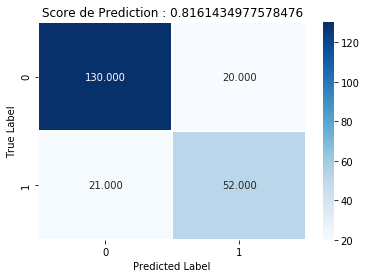

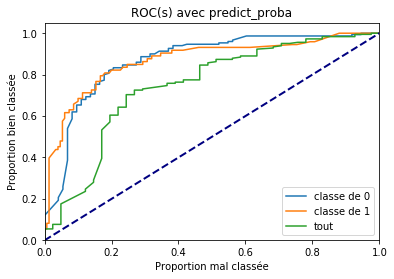

In [156]:
import seaborn as sns
log_reg = skl_linear_mdl.LogisticRegression()
log_reg.fit(X_train, Y_train)
score = log_reg.score(X_test, Y_test)
predicted_Y = log_reg.predict(X_test)
proba_Y = log_reg.predict_proba(X_test)

scores = cross_val_score(log_reg, X, Y, cv=10)
print(mean(scores))

confusion_matrix = skl_metrics.confusion_matrix(Y_test, predicted_Y)
print_confusion_matrix(confusion_matrix)
frp_global=[]
tpr_global=[]
AUC_global=dict()

fpr_global=dict()
tpr_global=dict()
fpr_global["Regression Logistique"],tpr_global["Regression Logistique"] =  \
    get_roc_curve(Y_test, proba_Y, predicted_Y, ["classe de 0","classe de 1","tout"])
AUC_global["Regression Logistique"] = \
    skl_metrics.auc(fpr_global["Regression Logistique"],tpr_global["Regression Logistique"])

            importance
Sex_male      0.155981
Sex_female    0.112785
Title         0.108681
Age*Class     0.097803
Pclass        0.054569
0.8238284530700261


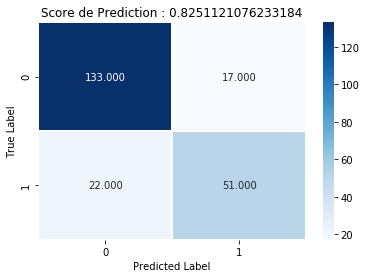

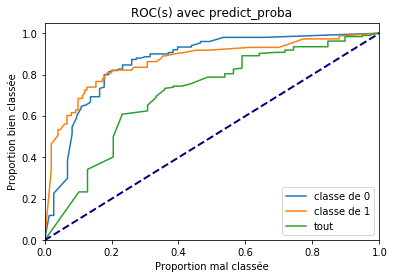

In [157]:
random_forest = skl_ensemble_mdl.RandomForestClassifier()
random_forest.fit(X_train, Y_train)
score = random_forest.score(X_test, Y_test)
predicted_Y = random_forest.predict(X_test)
proba_Y = random_forest.predict_proba(X_test)
true_Y = Y_test


feature_importances = pd.DataFrame(random_forest.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances.head())

scores = cross_val_score(random_forest, X, Y, cv=10)
print(mean(scores))
confusion_matrix = skl_metrics.confusion_matrix(true_Y, predicted_Y)
print_confusion_matrix(confusion_matrix)

fpr_global["Random Forest"], tpr_global["Random Forest"] = \
    get_roc_curve(Y_test, proba_Y, predicted_Y, ["classe de 0","classe de 1","tout"])
AUC_global["Random Forest"] = \
    skl_metrics.auc(fpr_global["Random Forest"], tpr_global["Random Forest"])

In [170]:
lda = skl_discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
score = lda.score(X_test, Y_test)
predicted_Y = lda.predict(X_test)
proba_Y=lda.predict_proba(X_test)
true_Y = Y_test

scores = cross_val_score(lda, X, Y, cv=10)
print(mean(scores))

confusion_matrix = skl_metrics.confusion_matrix(true_Y, predicted_Y)
print_confusion_matrix(confusion_matrix)

fpr_global["ald"],tpr_global["ald"]=get_roc_curve(Y_test,proba_Y,predicted_Y,["classe de 0","classe de 1","tout"])
AUC_global["ald"]=auc(fpr_global["ald"],tpr_global["ald"])

C:\Users\Alexandre\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


ValueError: Found input variables with inconsistent numbers of samples: [223, 418]

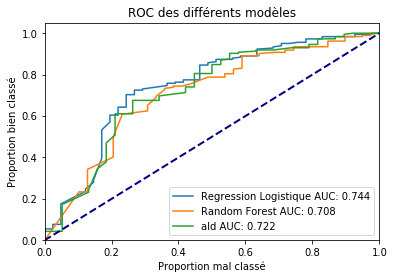

In [159]:
###Print des 3 ROC sur un même graph
for key in fpr_global:
    plt.plot(fpr_global[key], tpr_global[key], label=key +" AUC: " + str(round(AUC_global[key],3)))

lw = 2

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Proportion mal classé")
plt.ylabel("Proportion bien classé")
plt.title('ROC des différents modèles')
plt.legend(loc="lower right")

In [183]:
##If I print on Kaggle
X=combine[0]
Y =combine[0]["Survived"]
features=X.columns.values
features=list(features)
features.remove("Survived")
X_train = combine[0]
Y_train = combine[0]["Survived"]
X_test = combine[1]
print(X_test.head())

#Y_test = df_titanic_test["Survived"]

   PassengerId  Pclass  SibSp  Parch      Fare  Age*Class  Age_0.0  Age_1.0  \
0          892       3      0      0  1.156272        0.0        1        0   
1          893       3      1      0  1.124748        0.0        1        0   
2          894       2      0      0  1.214638        0.0        1        0   
3          895       3      0      0  1.184255        0.0        1        0   
4          896       3      1      1  1.277267        0.0        1        0   

   Age_64.0  Sex_female   ...     MedF  LargeF  Alone_0  Alone_1  Ticket_0  \
0         0           0   ...        0       0        0        1         1   
1         0           1   ...        0       0        1        0         1   
2         0           0   ...        0       0        1        0         1   
3         0           0   ...        0       0        1        0         1   
4         0           1   ...        1       0        1        0         1   

   Ticket_1  Title_0  Title_1  Title_2  Title_3  
0     

In [141]:
##For Kaggle

import seaborn as sns
#features = ['Cabin_0','Cabin_1','Single','SmallF','MedF','LargeF','Age*Class' ,'Age','Ticket_0','Ticket_1','Pclass','SibSp','Parch','Fare' , 'Sex_female','Sex_male','Emb_C' ,'Emb_Q','Emb_S','FamiliySize','Title']
log_reg = skl_linear_mdl.LogisticRegression()
print(features)
log_reg.fit(X_train[features], Y_train)
#score = log_reg.score(X_test, Y_test)
predicted_Y = log_reg.predict(X_test[features])
#proba_Y = log_reg.predict_proba(X_test)
submission = pd.DataFrame({'PassengerId':df_titanic_test['PassengerId'],'Survived':predicted_Y})
filename = 'Titanic Predictions 1.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)


['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age*Class', 'Sex_female', 'Sex_male', 'Emb_C', 'Emb_Q', 'Emb_S', 'Cabin_0', 'Cabin_1', 'FamiliySize', 'Single', 'SmallF', 'MedF', 'LargeF', 'Alone_0', 'Ticket_0', 'Ticket_1', 'Title']
Saved file: Titanic Predictions 1.csv


In [160]:
random_forest = skl_ensemble_mdl.RandomForestClassifier()
random_forest.fit(X_train[features], Y_train)
predicted_Y = random_forest.predict(X_test[features])
submission = pd.DataFrame({'PassengerId':df_titanic_test['PassengerId'],'Survived':predicted_Y})
filename = 'Titanic Predictions .csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)


Saved file: Titanic Predictions .csv


In [184]:
##For Kaggle
lda = skl_discriminant_analysis.LinearDiscriminantAnalysis()
lda.fit(X_train[features], Y_train)
predicted_Y = lda.predict(X_test[features])

submission = pd.DataFrame({'PassengerId':df_titanic_test['PassengerId'],'Survived':predicted_Y})
filename = 'Titanic Predictions 3.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)




Saved file: Titanic Predictions 3.csv


C:\Users\Alexandre\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [163]:

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train[features],Y_train)
predicted_y=decision_tree.predict(X_test[features])
#print(len(X_test))
submission = pd.DataFrame({'PassengerId':df_titanic_test['PassengerId'],'Survived':predicted_y})
filename = 'Titanic Predictions 4.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)


Saved file: Titanic Predictions 4.csv
